In [35]:
import numpy as np
from libsvm.svm import *
from libsvm.svmutil import *
import matplotlib.pyplot as plt

In [36]:
import seaborn as sns
import time

In [37]:
#file path
file='2019MT10718.csv'

In [38]:
#data taken from file
data=np.genfromtxt(file,delimiter=',')
#req_data=[x for x in data if x[25] in [2,9]]
#data=np.array(req_data)

In [39]:
data.shape

(3000, 26)

In [40]:
data[:5]

array([[-1.38722621e+00,  1.97009422e+00, -8.17460450e-01,
        -1.29818167e+00,  2.39521093e+00, -2.35403796e+00,
        -3.51096983e-01, -5.28852616e-02,  7.44110312e-02,
         6.07147942e-01, -7.68584287e-01,  1.54252683e+00,
        -4.47242389e-01, -6.82445824e-01,  1.23664142e+00,
        -2.51019539e-01, -4.24678678e-01,  4.40052452e-01,
        -1.88528558e-01, -3.83373842e-01,  2.79958390e-01,
        -6.06625594e-01,  1.79927038e-01, -1.33464930e+00,
         1.50773861e+00,  4.00000000e+00],
       [-3.55729353e+00, -4.62083801e-01, -5.06124749e-01,
        -2.35078106e-01, -1.63767306e+00, -1.15296805e+00,
         1.71849957e+00, -5.87456993e-01, -6.55865933e-01,
         4.41835731e-01,  1.01131021e+00,  1.45832462e+00,
        -3.07575607e-01, -4.16837000e-01, -2.38078528e-01,
        -8.90623850e-01, -1.03257819e+00, -3.46826736e-01,
         1.34602733e-01,  7.28830050e-02, -2.37428300e-03,
         4.04252148e-01,  2.55372077e-01, -7.81495172e-02,
        -3.82

In [55]:
xdata=data[:,:25]
tdata=data[:,25:].flatten()
#xdata=data[:,:10]

#tdata=tdata.reshape(tdata.shape[0],1)

In [56]:
tdata.shape

(3000,)

In [57]:
tdata.dtype

dtype('float64')

In [58]:
model = svm_train(tdata, xdata)

start_time = time.time()
p_labs, p_acc, p_vals = svm_predict(tdata, xdata, model )
print("--- %s seconds ---" % (time.time() - start_time))

Accuracy = 95.9% (2877/3000) (classification)
--- 0.13894295692443848 seconds ---


2
Accuracy = 88.2667% (1324/1500) (classification)
Accuracy = 88.2667% (1324/1500) (classification)
88.26666666666667
3
Accuracy = 89% (890/1000) (classification)
Accuracy = 89.1% (891/1000) (classification)
Accuracy = 89.1% (891/1000) (classification)
89.06666666666666
4
Accuracy = 90.2667% (677/750) (classification)
Accuracy = 90.2667% (677/750) (classification)
Accuracy = 90.1333% (676/750) (classification)
Accuracy = 90.1333% (676/750) (classification)
90.19999999999999
5
Accuracy = 90% (540/600) (classification)
Accuracy = 89.6667% (538/600) (classification)
Accuracy = 89.6667% (538/600) (classification)
Accuracy = 89.6667% (538/600) (classification)
Accuracy = 89.8333% (539/600) (classification)
89.76666666666667
6
Accuracy = 90.4% (452/500) (classification)
Accuracy = 89.8% (449/500) (classification)
Accuracy = 89.6% (448/500) (classification)
Accuracy = 89.4% (447/500) (classification)
Accuracy = 89.2% (446/500) (classification)
Accuracy = 89.2% (446/500) (classification)
89.60

Accuracy = 94.2675% (148/157) (classification)
Accuracy = 92.9936% (146/157) (classification)
Accuracy = 92.9936% (146/157) (classification)
Accuracy = 92.3567% (145/157) (classification)
Accuracy = 92.9936% (146/157) (classification)
Accuracy = 91.7197% (144/157) (classification)
Accuracy = 90.4459% (142/157) (classification)
Accuracy = 87.8981% (138/157) (classification)
Accuracy = 87.8981% (138/157) (classification)
Accuracy = 89.172% (140/157) (classification)
Accuracy = 87.8981% (138/157) (classification)
Accuracy = 89.172% (140/157) (classification)
Accuracy = 89.172% (140/157) (classification)
Accuracy = 89.172% (140/157) (classification)
Accuracy = 90.4459% (142/157) (classification)
Accuracy = 90.4459% (142/157) (classification)
Accuracy = 91.7197% (144/157) (classification)
Accuracy = 89.8089% (141/157) (classification)
90.7475695608448
20
Accuracy = 93.3333% (140/150) (classification)
Accuracy = 94% (141/150) (classification)
Accuracy = 92.6667% (139/150) (classification)
Ac

/Users/rajarshidas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


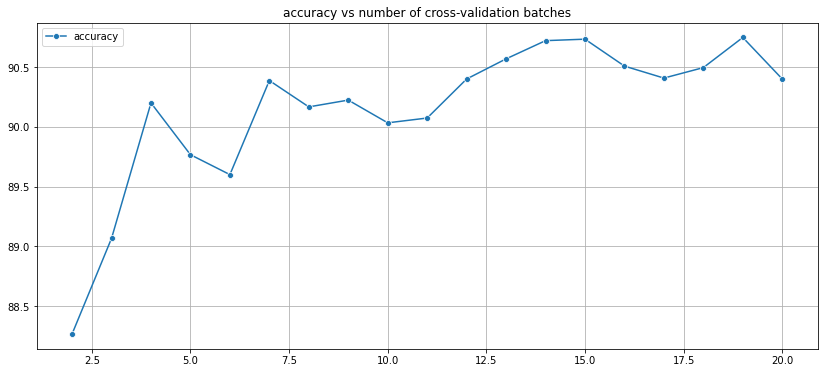

In [59]:
err=[]
min_lim=2
max_lim=21
for k in range(min_lim,max_lim):
    #k batch cross val (k taken to be 6 gives good result)
    data_points_total=xdata.shape[0]
    val_set_size=int(data_points_total/k)
    train_set_size=data_points_total-val_set_size
    accuracy=[]
    print(k)
    for val_step in range(k):
        test_begin_index=k*val_step
        test_end_index=min(test_begin_index+val_set_size,data_points_total)
        xtrain=np.append(xdata[:test_begin_index][:],xdata[test_end_index:][:])
        ttrain=np.append(tdata[:test_begin_index],tdata[test_end_index:])
        r=ttrain.shape[0]
        c=int(xtrain.shape[0]/r)
        xtrain=xtrain.reshape(r,c)
        xvalid=xdata[test_begin_index:test_end_index]
        tvalid=tdata[test_begin_index:test_end_index]
        #print(xvalid.shape,xtrain.shape)
        #print(tvalid)
        model = svm_train(ttrain, xtrain)
        p_labs, p_acc, p_vals = svm_predict(tvalid, xvalid, model )
        accuracy.append(p_acc[0])
    print(np.mean(accuracy))
    err.append(np.mean(accuracy))
#best fit poly after cross_validation
xp=[i for i in range(min_lim,max_lim)]
plt.figure(figsize=(14,6))
sns.lineplot(xp,err,marker='o',label='accuracy')
plt.title('accuracy vs number of cross-validation batches')
plt.grid(True)
plt.show()

In [64]:
#12 batch cross val 
data_points_total=xdata.shape[0]
k=15
val_set_size=int(data_points_total/k)
train_set_size=data_points_total-val_set_size
accuracy=[]
for val_step in range(k):
    test_begin_index=k*val_step
    test_end_index=min(test_begin_index+val_set_size,data_points_total)
    xtrain=np.append(xdata[:test_begin_index][:],xdata[test_end_index:][:])
    ttrain=np.append(tdata[:test_begin_index],tdata[test_end_index:])
    r=ttrain.shape[0]
    c=int(xtrain.shape[0]/r)
    xtrain=xtrain.reshape(r,c)
    xvalid=xdata[test_begin_index:test_end_index]
    tvalid=tdata[test_begin_index:test_end_index]
    #print(xvalid.shape,xtrain.shape)
    #print(tvalid)
    model = svm_train(ttrain, xtrain,'-t 2'  )
    start_time = time.time()
    p_labs, p_acc, p_vals = svm_predict(tvalid, xvalid, model )
    print("--- %s seconds ---" % (time.time() - start_time))
    accuracy.append(p_acc[0])

print('Number of batches',k)
print('Number of features are', 10)
#print('gamma value is',2)
print('final accuracy',np.mean(accuracy))

Accuracy = 93% (186/200) (classification)
--- 0.009341001510620117 seconds ---
Accuracy = 93% (186/200) (classification)
--- 0.009147167205810547 seconds ---
Accuracy = 93% (186/200) (classification)
--- 0.00946497917175293 seconds ---
Accuracy = 92.5% (185/200) (classification)
--- 0.009209871292114258 seconds ---
Accuracy = 92% (184/200) (classification)
--- 0.009240865707397461 seconds ---
Accuracy = 92% (184/200) (classification)
--- 0.009195089340209961 seconds ---
Accuracy = 91% (182/200) (classification)
--- 0.009361982345581055 seconds ---
Accuracy = 89% (178/200) (classification)
--- 0.00927114486694336 seconds ---
Accuracy = 88.5% (177/200) (classification)
--- 0.009380817413330078 seconds ---
Accuracy = 89.5% (179/200) (classification)
--- 0.009027957916259766 seconds ---
Accuracy = 90.5% (181/200) (classification)
--- 0.009443998336791992 seconds ---
Accuracy = 89% (178/200) (classification)
--- 0.009217023849487305 seconds ---
Accuracy = 89.5% (179/200) (classification)
--

-t 3 -g 5
Accuracy = 24.8% (62/250) (classification)
--- 0.021465063095092773 seconds ---
-t 3 -g 5
Accuracy = 25.2% (63/250) (classification)
--- 0.020743846893310547 seconds ---
-t 3 -g 5
Accuracy = 26.4% (66/250) (classification)
--- 0.021234989166259766 seconds ---
-t 3 -g 5
Accuracy = 26.4% (66/250) (classification)
--- 0.020733118057250977 seconds ---
-t 3 -g 5
Accuracy = 25.6% (64/250) (classification)
--- 0.021130084991455078 seconds ---
-t 3 -g 5
Accuracy = 28.4% (71/250) (classification)
--- 0.02097916603088379 seconds ---
-t 3 -g 5
Accuracy = 26% (65/250) (classification)
--- 0.020964860916137695 seconds ---
-t 3 -g 5
Accuracy = 28.8% (72/250) (classification)
--- 0.021164894104003906 seconds ---
-t 3 -g 5
Accuracy = 26.8% (67/250) (classification)
--- 0.021537065505981445 seconds ---
-t 3 -g 5
Accuracy = 24.8% (62/250) (classification)
--- 0.021725177764892578 seconds ---
-t 3 -g 5
Accuracy = 24.4% (61/250) (classification)
--- 0.02180027961730957 seconds ---
-t 3 -g 5
Accu

Accuracy = 28.4% (71/250) (classification)
--- 0.02114105224609375 seconds ---
-t 3 -g 5
Accuracy = 26% (65/250) (classification)
--- 0.021632909774780273 seconds ---
-t 3 -g 5
Accuracy = 28.8% (72/250) (classification)
--- 0.02089071273803711 seconds ---
-t 3 -g 5
Accuracy = 26.8% (67/250) (classification)
--- 0.021251678466796875 seconds ---
-t 3 -g 5
Accuracy = 24.8% (62/250) (classification)
--- 0.021234989166259766 seconds ---
-t 3 -g 5
Accuracy = 24.4% (61/250) (classification)
--- 0.021188974380493164 seconds ---
-t 3 -g 5
Accuracy = 26.4% (66/250) (classification)
--- 0.021422147750854492 seconds ---
Number of batches 12
final accuracy 26.166666666666668
-t 3 -g 5
Accuracy = 24.8% (62/250) (classification)
--- 0.021059751510620117 seconds ---
-t 3 -g 5
Accuracy = 25.2% (63/250) (classification)
--- 0.02089715003967285 seconds ---
-t 3 -g 5
Accuracy = 26.4% (66/250) (classification)
--- 0.02090597152709961 seconds ---
-t 3 -g 5
Accuracy = 26.4% (66/250) (classification)
--- 0.02

Accuracy = 24.8% (62/250) (classification)
--- 0.02089381217956543 seconds ---
-t 3 -g 5
Accuracy = 24.4% (61/250) (classification)
--- 0.02129364013671875 seconds ---
-t 3 -g 5
Accuracy = 26.4% (66/250) (classification)
--- 0.021625995635986328 seconds ---
Number of batches 12
final accuracy 26.16666666666667
-t 3 -g 5
Accuracy = 24.8% (62/250) (classification)
--- 0.021580934524536133 seconds ---
-t 3 -g 5
Accuracy = 25.2% (63/250) (classification)
--- 0.021129131317138672 seconds ---
-t 3 -g 5
Accuracy = 26.4% (66/250) (classification)
--- 0.02117609977722168 seconds ---
-t 3 -g 5
Accuracy = 26.4% (66/250) (classification)
--- 0.021192073822021484 seconds ---
-t 3 -g 5
Accuracy = 25.6% (64/250) (classification)
--- 0.021795988082885742 seconds ---
-t 3 -g 5
Accuracy = 28.4% (71/250) (classification)
--- 0.021803855895996094 seconds ---
-t 3 -g 5
Accuracy = 26% (65/250) (classification)
--- 0.02123093605041504 seconds ---
-t 3 -g 5
Accuracy = 28.8% (72/250) (classification)
--- 0.021

Accuracy = 25.2% (63/250) (classification)
--- 0.02089405059814453 seconds ---
-t 3 -g 5
Accuracy = 26.4% (66/250) (classification)
--- 0.021038055419921875 seconds ---
-t 3 -g 5
Accuracy = 26.4% (66/250) (classification)
--- 0.020968198776245117 seconds ---
-t 3 -g 5
Accuracy = 25.6% (64/250) (classification)
--- 0.021600961685180664 seconds ---
-t 3 -g 5
Accuracy = 28.4% (71/250) (classification)
--- 0.021352052688598633 seconds ---
-t 3 -g 5
Accuracy = 26% (65/250) (classification)
--- 0.02162003517150879 seconds ---
-t 3 -g 5
Accuracy = 28.8% (72/250) (classification)
--- 0.02163100242614746 seconds ---
-t 3 -g 5
Accuracy = 26.8% (67/250) (classification)
--- 0.021561861038208008 seconds ---
-t 3 -g 5
Accuracy = 24.8% (62/250) (classification)
--- 0.02151799201965332 seconds ---
-t 3 -g 5
Accuracy = 24.4% (61/250) (classification)
--- 0.021239042282104492 seconds ---
-t 3 -g 5
Accuracy = 26.4% (66/250) (classification)
--- 0.021651268005371094 seconds ---
Number of batches 12
final

Accuracy = 28.4% (71/250) (classification)
--- 0.021808862686157227 seconds ---
-t 3 -g 5
Accuracy = 26% (65/250) (classification)
--- 0.021252870559692383 seconds ---
-t 3 -g 5
Accuracy = 28.8% (72/250) (classification)
--- 0.021018028259277344 seconds ---
-t 3 -g 5
Accuracy = 26.8% (67/250) (classification)
--- 0.021318912506103516 seconds ---
-t 3 -g 5
Accuracy = 24.8% (62/250) (classification)
--- 0.021265029907226562 seconds ---
-t 3 -g 5
Accuracy = 24.4% (61/250) (classification)
--- 0.021007776260375977 seconds ---
-t 3 -g 5
Accuracy = 26.4% (66/250) (classification)
--- 0.021322011947631836 seconds ---
Number of batches 12
final accuracy 26.166666666666668


/Users/rajarshidas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


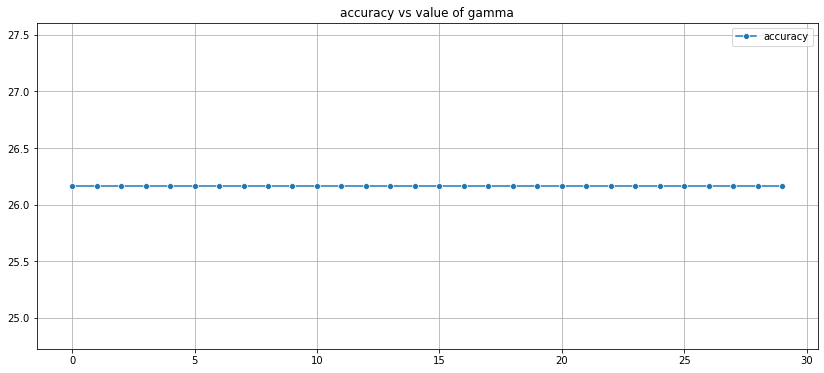

In [61]:
#15 batch cross val 
data_points_total=xdata.shape[0]
k=12
val_set_size=int(data_points_total/k)
train_set_size=data_points_total-val_set_size
accuracy=[]
vals=[i for i in range(0,30)]
acc_val=[]
for i in vals:
    for val_step in range(k):
        test_begin_index=k*val_step
        test_end_index=min(test_begin_index+val_set_size,data_points_total)
        xtrain=np.append(xdata[:test_begin_index][:],xdata[test_end_index:][:])
        ttrain=np.append(tdata[:test_begin_index],tdata[test_end_index:])
        r=ttrain.shape[0]
        c=int(xtrain.shape[0]/r)
        xtrain=xtrain.reshape(r,c)
        xvalid=xdata[test_begin_index:test_end_index]
        tvalid=tdata[test_begin_index:test_end_index]
        #print(xvalid.shape,xtrain.shape)
        #print(tvalid)
        #pars='-t 3 -g '+str(i)
        print(pars)
        model = svm_train(ttrain, xtrain ,pars )
        start_time = time.time()
        p_labs, p_acc, p_vals = svm_predict(tvalid, xvalid, model )
        print("--- %s seconds ---" % (time.time() - start_time))
        accuracy.append(p_acc[0])

    print('Number of batches',k)
    #print('Number of samples are', 10)
    #print('gamma value is',2)
    print('final accuracy',np.mean(accuracy))
    acc_val.append(np.mean(accuracy))
plt.figure(figsize=(14,6))
sns.lineplot(vals,acc_val,marker='o',label='accuracy')
plt.title('accuracy vs value of gamma')
plt.grid(True)
plt.show()
